In [1]:
import torch
import numpy as np

In [2]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
from src.train import prepare_training_data, train_unet, train_unet_plusplus, validate
from src.predict import predict
from src.unet import UNet
from src.unet_plusplus import UNetPlusPlus

In [4]:
n_epochs = 10
lr = 1e-3
batch_size = 1
weight_decay = 1e-5
random_state = np.random.RandomState(0)

In [5]:
train_loader, valid_loader = prepare_training_data(
    train_size=0.90, 
    batch_size=batch_size, 
    random_state=random_state)

In [ ]:
train_unet_plusplus(
    train_loader,
    valid_loader,
    resume=False,
    n_epochs=n_epochs,
    lr=lr,
    weight_decay=weight_decay,
    loss_type='soft_dice',
)

In [ ]:
train_unet_plusplus(
    train_loader,
    valid_loader,
    resume=True,
    n_epochs=n_epochs,
    lr=lr,
    weight_decay=weight_decay,
    loss_type='soft_dice',
)

In [ ]:
# train_unet(train_loader, 
#       valid_loader, 
#       resume=True, 
#       n_epochs=n_epochs, 
#       lr=lr, 
#       weight_decay=weight_decay, 
#       loss_type='soft_dice', 
#       add_out_layers=False,
#       weight_map=True)

In [6]:
check_point = torch.load('../check_point/check_point')

In [7]:
model = UNetPlusPlus(in_channels=3, n_classes=2, padding=(117, 118, 108, 108))
for k,v in check_point.items():
    print(k)
model.load_state_dict(check_point['model_state_dict'])

epoch
model_state_dict
optimizer_state_dict


IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [ ]:
validate(model, valid_loader, prune_level=4)
validate(model, valid_loader, prune_level=3)
validate(model, valid_loader, prune_level=2)
validate(model, valid_loader, prune_level=1)

cuda:0
Mean Dice Score: 0.684302
cuda:0
Mean Dice Score: 0.685595
cuda:0
Mean Dice Score: 0.683744
cuda:0


In [ ]:
model = UNetPlusPlus(in_channels=3, n_classes=2, padding=(117, 118, 108, 108))
for k,v in check_point.items():
    print(k)
model.load_state_dict(check_point['model_state_dict'])

In [ ]:
validate(model, valid_loader, prune_level=4)
validate(model, valid_loader, prune_level=3)
validate(model, valid_loader, prune_level=2)
validate(model, valid_loader, prune_level=1)

In [ ]:
# model = UNet(in_channels=3, padding=(117, 118, 108, 108),  add_out_layers=False)
# for k,v in check_point.items():
#     print(k)
# model.load_state_dict(check_point['model_state_dict'])

In [8]:
predict(model=model, device='gpu')

cuda:0
(117, 118, 108, 108)
Model: UNet++
Predicted image 1 saved
Model: UNet++
Predicted image 2 saved
Model: UNet++
Predicted image 3 saved
Model: UNet++
Predicted image 4 saved
Model: UNet++
Predicted image 5 saved
Model: UNet++
Predicted image 6 saved
Model: UNet++
Predicted image 7 saved
Model: UNet++
Predicted image 8 saved
Model: UNet++
Predicted image 9 saved
Model: UNet++
Predicted image 10 saved
Model: UNet++
Predicted image 11 saved
Model: UNet++
Predicted image 12 saved
Model: UNet++
Predicted image 13 saved
Model: UNet++
Predicted image 14 saved
Model: UNet++
Predicted image 15 saved
Model: UNet++
Predicted image 16 saved
Model: UNet++
Predicted image 17 saved
Model: UNet++
Predicted image 18 saved
Model: UNet++
Predicted image 19 saved
Model: UNet++
Predicted image 20 saved


In [9]:
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

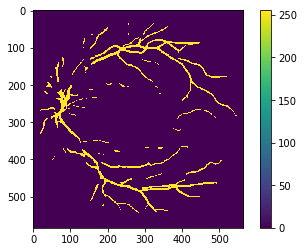

In [10]:
img = Image.open(os.path.join(module_path, 'data/predict/1.png'))
plt.imshow(img)
plt.colorbar()
plt.show()

In [ ]:
device = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [ ]:
torch.cuda.get_device_capability(device)

In [ ]:
torch.cuda.max_memory_allocated(device=device)/1024/1024